In [1]:
import os
import numpy as np
import pandas as pd
import h5py 

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

In [2]:
specimen_id = 599659785
mouse_id = 334310

In [3]:
analysis_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\BehaviorImaging\DoC\2P6_data_analysis'
base_dir = r"\\allen\programs\braintv\production\neuralcoding\prod0\specimen_"
data_dir = os.path.join(base_dir+str(specimen_id))

analyzing  \\allen\programs\braintv\production\neuralcoding\prod0\specimen_599659785\ophys_session_639241139
creating dataset object
Visual frames detected in sync: 215694
2P frames detected in sync: 111648
170928
visual frames in pkl file: 215694
Loading \\allen\programs\braintv\workgroups\neuralcoding\Behavior\Data\M334310\output\170928155439-task=DoC_NaturalImages_Ophys_SessionA_stage=natural_images_ophys_session_A_mouse=M334310.pkl
stim type is  images


c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\dataset\visual_behavior_scientifica_dataset.py:190: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  running_speed_cm_per_sec = pd.rolling_mean(running_speed_cm_per_sec, window=6)


length of traces: 111640
number of segmented cells: 101
response_dataframe.h5 already in  \\allen\programs\braintv\production\neuralcoding\prod0\specimen_599659785\ophys_session_639241139
analyzing  \\allen\programs\braintv\production\neuralcoding\prod0\specimen_599659785\ophys_session_639850783
creating dataset object
problem for  \\allen\programs\braintv\production\neuralcoding\prod0\specimen_599659785\ophys_session_639850783
analyzing  \\allen\programs\braintv\production\neuralcoding\prod0\specimen_599659785\ophys_session_639379154
creating dataset object
Visual frames detected in sync: 215790
2P frames detected in sync: 111615
170929
visual frames in pkl file: 215790
Loading \\allen\programs\braintv\workgroups\neuralcoding\Behavior\Data\M334310\output\170929152745-task=DoC_NaturalImages_Ophys_SessionB_stage=natural_images_ophys_session_B_mouse=M334310.pkl
stim type is  images
length of traces: 111612
number of segmented cells: 152
response_dataframe.h5 already in  \\allen\programs\

c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\response_analysis\response_analysis.py:175: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  (_, p) = stats.f_oneway(trace[baseline_start:baseline_end], trace[stim_start:stim_end])


saving response dataframe


C:\Anaconda\lib\site-packages\pandas\core\generic.py:1138: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['response', 'response_timestamps', 'run_speed', 'run_timestamps', 'lick_times', 'initial_image', 'change_image', 'trial_type', 'behavioral_response_type']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


creating mean response dataframe
creating cell summary dataframe
creating cell summary dataframe
generating experiment summary figures


c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:653: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  frame_times.append(times[frame])
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1897: RuntimeWarning: invalid value encountered in greater
  cond1 = (0 < q) & (q < 1)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1897: RuntimeWarning: invalid value encountered in less
  cond1 = (0 < q) & (q < 1)


generating cell summary figures


c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:1561: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  trace = tdf.mean_trace.values[0][frames_range[0]:frames_range[1]]
c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:1562: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sem = tdf.sem_trace.values[0][frames_range[0]:frames_range[1]]
c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:1615: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  trace = tdf.mean_trace.values[0][frames_range[0]:frames_range[1]]
c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py

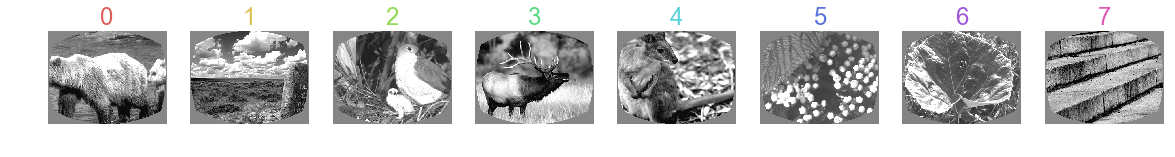

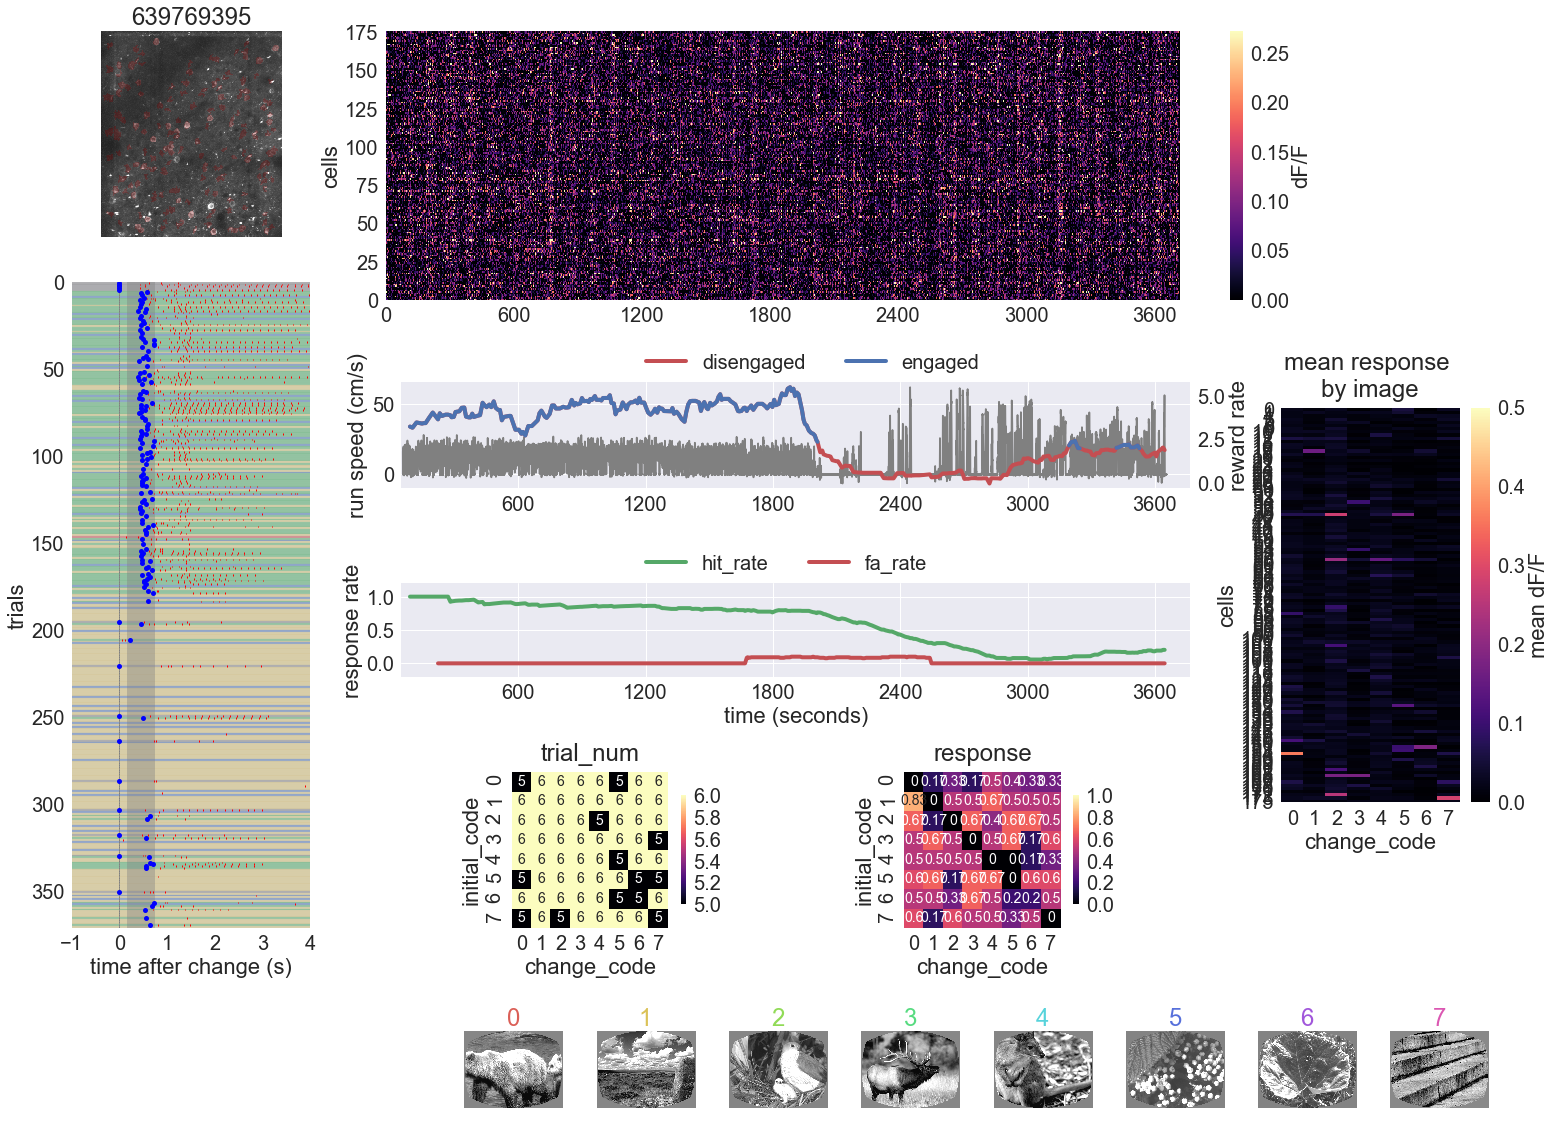

In [4]:
for expt_folder in [folder for folder in os.listdir(data_dir) if 'ophys_session' in folder]:
    ophys_session_dir = os.path.join(data_dir,expt_folder)
    print 'analyzing ',ophys_session_dir
    try:
        from visual_behavior_ophys.dataset.visual_behavior_scientifica_dataset import VisualBehaviorScientificaDataset
        print 'creating dataset object'
        dataset= VisualBehaviorScientificaDataset(ophys_session_dir, mouse_id=mouse_id, analysis_dir=analysis_dir)

        if 'response_dataframe.h5' not in os.listdir(os.path.join(analysis_dir,expt_folder[14:],'analysis')):
            from visual_behavior_ophys.response_analysis.response_analysis import ResponseAnalysis 
            print 'creating response analysis object'
            ra = ResponseAnalysis(dataset)

            from visual_behavior_ophys.plotting_tools import summary_figures as sf

            rdf = ra.response_df
            mdf = ra.mean_response_df
            sdf = ra.get_cell_summary_df(p_val_thresh=0.005, sd_over_baseline_thresh=3)

            print 'generating experiment summary figures'
            sf.plot_images(dataset,mdf,save=True);
            sf.plot_experiment_summary_figure(dataset, mdf, sdf, save=True)
            sf.plot_behavior_events_trace(dataset, ra.response_df.cell.unique(), xmin=360, length=5, ax=None, save=True)
            print 'generating cell summary figures'
            for cell in mdf.cell.unique():
                sf.plot_cell_summary_figure(dataset,ra, cell, save=True)
        else: 
            print 'response_dataframe.h5 already in ',ophys_session_dir
    except: 
        print 'problem for ',ophys_session_dir

In [ ]:
for expt_folder in [folder for folder in os.listdir(data_dir) if 'ophys_session' in folder]:
    ophys_session_dir = os.path.join(data_dir,expt_folder)
    print 'analyzing ',ophys_session_dir
    try:
        from visual_behavior_ophys.dataset.visual_behavior_scientifica_dataset import VisualBehaviorScientificaDataset
        print 'creating dataset object'
        dataset= VisualBehaviorScientificaDataset(ophys_session_dir, mouse_id=mouse_id, analysis_dir=analysis_dir)

        from visual_behavior_ophys.response_analysis.response_analysis import ResponseAnalysis 
        print 'creating response analysis object'
        ra = ResponseAnalysis(dataset)

        from visual_behavior_ophys.plotting_tools import summary_figures as sf

        rdf = ra.response_df
        mdf = ra.mean_response_df
        sdf = ra.get_cell_summary_df(p_val_thresh=0.005, sd_over_baseline_thresh=3)

        print 'generating experiment summary figures'
        sf.plot_images(dataset,mdf,save=True);
        sf.plot_experiment_summary_figure(dataset, mdf, sdf, save=True)
        sf.plot_behavior_events_trace(dataset, ra.response_df.cell.unique(), xmin=360, length=5, ax=None, save=True)
        print 'generating cell summary figures'
        for cell in mdf.cell.unique():
            sf.plot_cell_summary_figure(dataset,ra, cell, save=True)
    except: 
        print 'problem for ',ophys_session_dir

In [13]:
# sf.plot_traces_heatmap(dataset, save=True,cbar=True,ax=None)

In [14]:
# for cell in mdf.cell.unique():
#     sf.plot_transition_type_heatmap(ra, [cell], vmax=np.percentile(dataset.dff_traces[cell, :], 99.9), ax=None, cmap='magma', colorbar=False,save=True);

In [15]:
# for trace in dataset.dff_traces
# sf.plot_trace(timestamps, trace, ax=None, xlabel='seconds', ylabel='dF/F')

In [40]:
dataset.stim_codes.stim_code.values

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)